# Title: Thomas Fire Analysis: AQI and False Color Image
By Caitlin Nordheim-Maestas

Link to github repo: https://github.com/cnordheim-maestas/eds-220-hwk4-task3-Presentation-ready-repo.git

## About

### Purpose

The purpose of these analyses are to look at the impacts of the Thomas Fire on Santa Barbara County. This fire occurred in December 2017 and continued through mid January 2018. We are looking into how the Air Quality Index may have changed throughout 2017 and 2018 in relation to the fire, and we are looking at in relation to the geographic location of the fire by overlaying the Thomas fire perimeter over a false color image of the surrounding area to look at the short-wave infrared (swir22) and near-infrared values. 

### Highlights of analyses 

To look at the AQI throughout time, we will use the AQI data collected from the United States Environmental Protection Agency Air Data (citation below) from 2017 and 2018. We will combine the datasets, select only the observations from Santa Barbara County, calculate the rolling 5-day average AQI, then observe the average AQI and AQI readings over time, looking closely at December 2017 and January 2018. 

To create the false color image to elucidate any patterns with the Thomas fire's location, we will utilize the United States Geological Survey Landsat Missions data hosted by Microsoft Planetary Computer (citation below). We will plot the false color image, and overlay it with the perimeter of the Thomas fire. The Thomas fire perimeter is from the California Department of Forestry and Fire Protection (citation below), and we will first ensure it is in the same coordinate reference system as the Landsat data, then select only the data about the Thomas Fire, then we will overlay it with the map to look for patterns. 

### Data citations
Air quality data:

United States Environmental Protection Agency Air Data (2023), daily_aqi_by_cbsa_2017.zip [Data file] Available from: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI. Access date: 11.27.2023.

False Color image datasets:

1: Landsat data: United States Geological Survey Landsat Missions hosted by Microsoft Planetary Computer (2023), Landsat Collection 2 Level-2 [Data file] Available from: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. Access date: 11.27.2023.

2: California Fire Perimeter: California Department of Forestry and Fire Protection (2023), California Fire Perimeters (all) [Data file] Available from: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about. Access date: 11.27.2023.

## AQI (1): Importing libraries and data

In [1]:
# Import libraries and functions
import pandas as pd # data manipulation & analysis

In [2]:
# import AQI 2017 data
# using the pandas read_csv function
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_17.head(2) # check it imported by viewing top 2 rows

State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2017-01-01   21     Good   
1    Alabama     Baldwin           1            3  2017-01-04   22     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1

In [3]:
# import AQI 2018 data
# using the pandas read_csv function
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')
aqi_18.head(2) # check it imported by viewing top 2 rows

State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2018-01-02   32     Good   
1    Alabama     Baldwin           1            3  2018-01-05   34     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1

## AQI (2) Data cleaning and geographical context of data

In [4]:
# AQI data
# glue the 2017 and 2018 files together using concatenate
aqi = pd.concat([aqi_17, aqi_18])
print('number of columns in merged dataset: ', len(aqi))
print('expecting this number of rows: ', len(aqi_17) + len(aqi_18))

# clean column names: make all lower case and replace spaces with underscores
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')
print('updated column names: ', aqi.columns.values) # confirm updated column names

# subset Santa Barbara: select rows where the county_name is santa barbara only
aqi_sb=aqi.loc[aqi.county_name=="Santa Barbara"]
print('unique counties in santa barbara subset (expecting only Santa Barbara): ', aqi_sb.county_name.unique())

# drop unecessary columns from subset: drop 'state_name', 'county_name', 'state_code' and 'county_code' columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code','county_code'])
print('updated column names in sb subset: ', aqi_sb.columns.values) # confirm updated column names

# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)
print('the data type for the date is now: ', aqi_sb.date.dtypes)

# set date coumn as index
aqi_sb = aqi_sb.set_index('date')
aqi_sb.head(2) # check new index

number of columns in merged dataset:  654338
expecting this number of rows:  654338
updated column names:  ['state_name' 'county_name' 'state_code' 'county_code' 'date' 'aqi'
 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting']
unique counties in santa barbara subset (expecting only Santa Barbara):  ['Santa Barbara']
updated column names in sb subset:  ['date' 'aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting']
the data type for the date is now:  datetime64[ns]


aqi category defining_parameter defining_site  \
date                                                        
2017-01-01   39     Good              Ozone   06-083-4003   
2017-01-02   36     Good              Ozone   06-083-4003   

            number_of_sites_reporting  
date                                   
2017-01-01                         12  
2017-01-02                         11

## AQI (3): Data Exploration

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   aqi                        730 non-null    int64 
 1   category                   730 non-null    object
 2   defining_parameter         730 non-null    object
 3   defining_site              730 non-null    object
 4   number_of_sites_reporting  730 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 34.2+ KB
None
the range of aqi values is:  20 - 281


<AxesSubplot:title={'center':'Exploratory plot of SB AQI dataset'}, xlabel='date'>

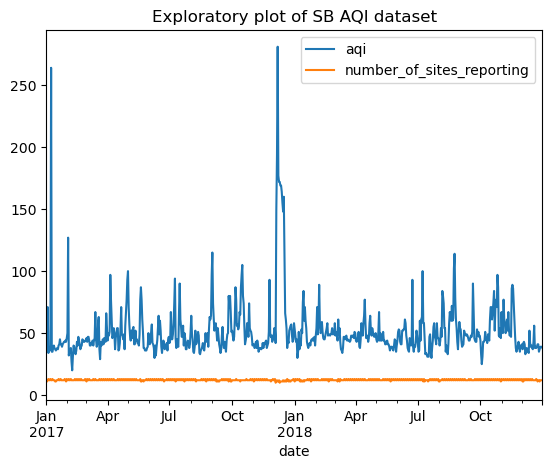

In [5]:
# AQI data
# Let's explore the cleaned aqi data, that just has Santa Barbara, and includes 2017 and 2018

# use the .info() function to see the datatypes, number of entries, and timeframe in the datetime index
print(aqi_sb.info())

# for fun, let's look at the range of the aqi values
print('the range of aqi values is: ', aqi_sb.aqi.min(), '-', aqi_sb.aqi.max())

aqi_sb.plot(title="Exploratory plot of SB AQI dataset") #preliminary plot

## AQI (4): Analysis

In [6]:
# AQI analysis
# Broad goal: Determine if and how the AQI changes through time 2017-2018
# More specifically, does the average 5-day AQI show any important patterns throughout 2017-2018, keeping the thomas fire in mind?

# Analysis: calculate the 5-day rolling average and add it as a column

# add column with 5 day average AQI and calculate the 5 day rolling average using the "rolling" function
# '5D' corresponds to 5 day
# .mean() because we want the average
# adding a column using the syntax on the left

aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# let's check that it worked! 
print('updated column names (checking the five_day_average showed up): ', aqi_sb.columns.values) # confirm updated column names
# let's check the range of average values
print('the range of aqi 5 day average values is: ', aqi_sb.five_day_average.min(), '-', aqi_sb.five_day_average.max())

updated column names (checking the five_day_average showed up):  ['aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting' 'five_day_average']
the range of aqi 5 day average values is:  30.4 - 199.2


<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

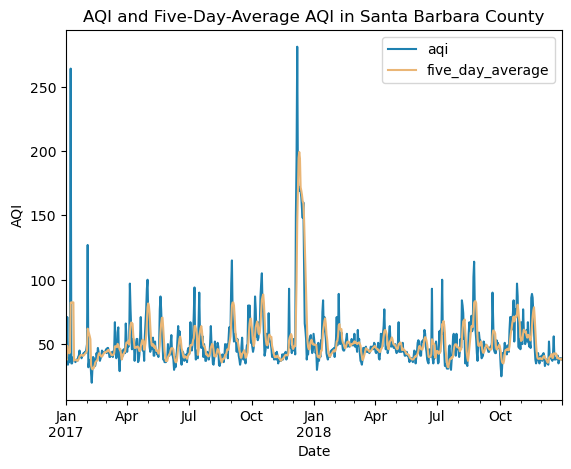

In [7]:
# AQI Analysis continued: let's plot!
# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

## False Color Image (1): Importing libraries and data

In [8]:
# Import libraries and functions
import os # accessible file paths
import numpy as np # math operations
import pandas as pd # data manipulation & analysis
import geopandas as gpd # geospatial data manipulation
from shapely.geometry import Polygon
import xarray as xr # for n-dimmensional array data
import rioxarray as rioxr # for geospatial n-dimmensional array data
from rasterio.features import rasterize # for rasterizing polygons
# plotting
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for pretty legends

In [9]:
# import landsat data
# using rasterio 
# use the os to get the current working directory
land_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
land = rioxr.open_rasterio(land_fp) # use this for geospatial raster data
land # check it imported

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [10]:
# fire perimeters in California during 2017
# using geopandas
# use the os to get the current working directory
fire_fp = os.path.join(os.getcwd(),'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp')
fire = gpd.read_file(fire_fp) # use gpd to read the file because it's a shapefile
fire.head(2) # check it imported by viewing top 2 rows

index  OBJECTID YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  ALARM_DATE  \
0  19836     41429  2017    CA    CCO     VNC     BROOK  00042450  2017-05-23   
1  19837     41430  2017    CA    CCO     VNC   PACIFIC  00075307  2017-09-09   

    CONT_DATE  ...  GIS_ACRES  \
0  2017-05-24  ...  10.043819   
1  2017-09-09  ...   1.190109   

                                            COMMENTS  COMPLEX_NA  COMPLEX_IN  \
0                                   per walked track        None        None   
1  Final Walked track.  Small spot to the north east        None        None   

  IRWINID FIRE_NUM DECADES   SHAPE_Leng    SHAPE_Area  \
0    None     None    2010  1246.055781  59473.666651   
1    None     None    2010   561.418202   7081.369481   

                                            geometry  
0  POLYGON ((-13229812.974 4046876.486, -13229786...  
1  POLYGON ((-13286872.985 4074523.355, -13286895...  

[2 rows x 23 columns]

## False Color Image (2): Data cleaning and geographical context of data

In [11]:
# Landsat data cleaning and geographic context
# Raster reduction: drop the bands in land data

# remove length 1 dimension (band)
land = land.squeeze()

# remove coordinates associated to band
land = land.drop('band')
land

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

In [12]:
# Fire perimeters data cleaning

# make sure CRS' match
fire_reprojected = fire.to_crs(land.rio.crs) # change to the land crs
print('matched crs?',  fire_reprojected.crs == land.rio.crs) # ensure they match

# subset only thomas fire
fire_clipped = fire_reprojected[(fire_reprojected.FIRE_NAME=='THOMAS')]

# ensure it worked
print('unique fire names in clipped subset (expecting only THOMAS): ', fire_clipped.FIRE_NAME.unique())

matched crs? True
unique fire names in clipped subset (expecting only THOMAS):  ['THOMAS']


## False Color Image (3) Data Exploration

In [13]:
# Landsat data exploration
# check crs, height, width, bounding box
print('CRS: ', land.rio.crs)
print('height: ', land.rio.height)
print('width: ', land.rio.width, '\n')

print('spatial bounding box: ')
print(land.rio.bounds(), '\n')

# look at the data
land

CRS:  EPSG:32611
height:  731
width:  870 

spatial bounding box: 
(121170.0, 3755160.0, 356070.0, 3952530.0) 



<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

original crs:  epsg:3857 updated crs:  PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       608 non-null    int64   
 1   OBJECTID    608 non-null    int64   
 2   YEAR_       608 non-null    object  
 3   STATE       608 non-null    object  
 4   AGENCY      608 non-null    object  
 5   UNIT_ID     608 non-null    object  
 6   FIRE_NA

<AxesSubplot:>

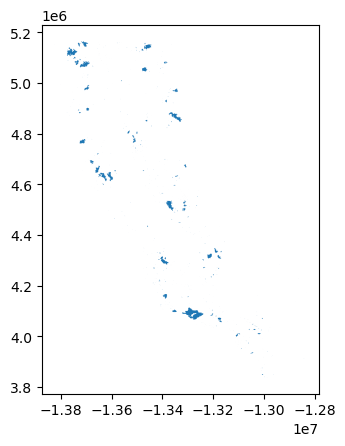

In [14]:
# Fire perimeters data exploration
# check original crs and updated crs:
print('original crs: ',  fire.crs, 'updated crs: ', fire_clipped.crs)

# let's get some info on the original and updated datasets
print('original dataset info: ', fire.info())
print('updated dataset info: ', fire_clipped.info())

# data exploration continued
# let's compare the full dataset to the dataset with only thomas fire
fire.plot() # whole dataset

<AxesSubplot:>

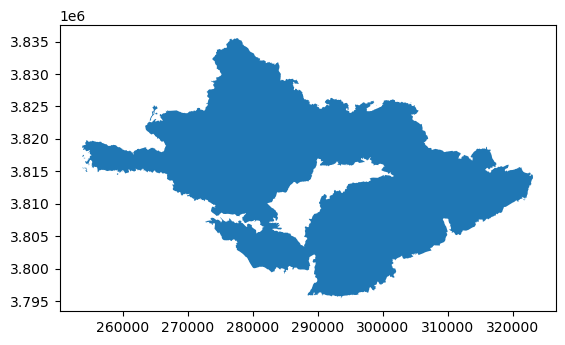

In [15]:
# data exploration continued
fire_clipped.plot() # just the thomas fire

## False Color Image (4) Analysis

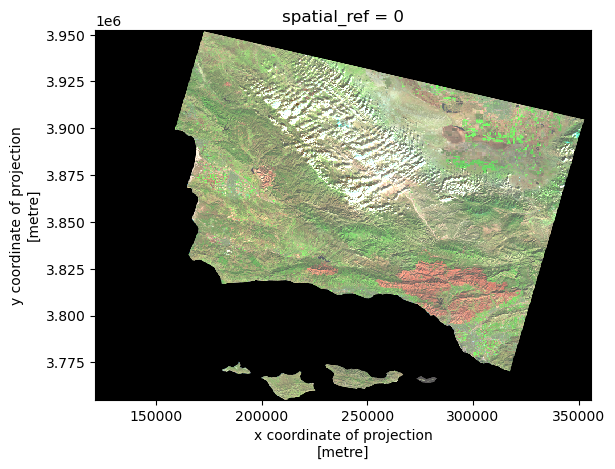

In [16]:
# false color image: short-wave infrared (swir22), near-infrared, and red variables (in that order)
# robust = True: "colormap range is computed with 2nd and 98th percentiles instead of the extreme values" from documentation
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True)

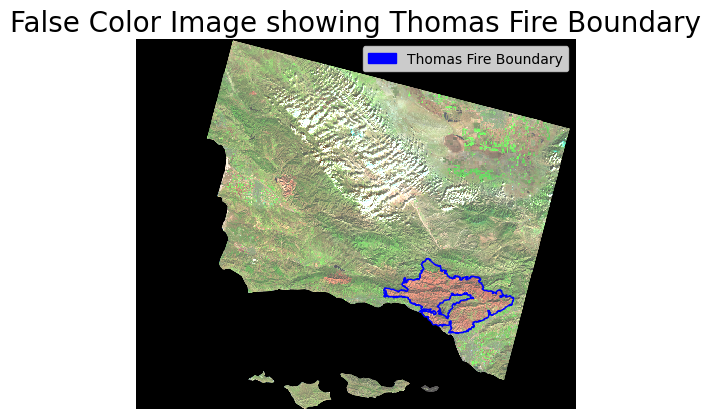

In [17]:
# add in the thomas fire outline
fig, ax= plt.subplots()
ax.axis('off') # remove the pesky box

#----------------------------------
# False color image
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True, ax=ax)
#----------------------------------
# thomas fire
fire_clipped.plot(ax=ax, edgecolor='blue', facecolor="none")
# make legend pretty
bbox_patch = mpatches.Patch(color='blue', label = 'Thomas Fire Boundary')

#----------------------------------
# create a legend
ax.legend(handles = [bbox_patch], loc='upper right')

# add a title
ax.set_title('False Color Image showing Thomas Fire Boundary', fontsize=20)

plt.show()

## 5. Final outputs

<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

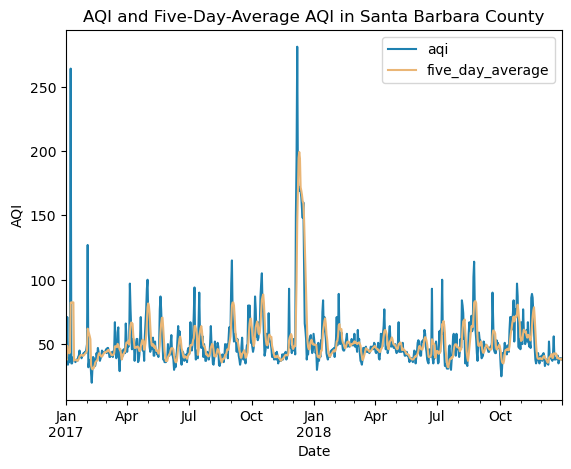

In [18]:
# AQI through time
# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

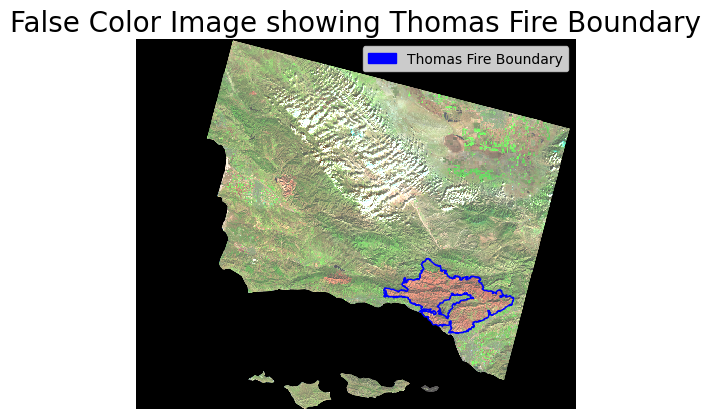

In [19]:
# False color image:
fig, ax= plt.subplots()
ax.axis('off') # remove the pesky box

#----------------------------------
# False color image
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True, ax=ax)
#----------------------------------
# thomas fire
fire_clipped.plot(ax=ax, edgecolor='blue', facecolor="none")
# make legend pretty
bbox_patch = mpatches.Patch(color='blue', label = 'Thomas Fire Boundary')

#----------------------------------
# create a legend
ax.legend(handles = [bbox_patch], loc='upper right')

# add a title
ax.set_title('False Color Image showing Thomas Fire Boundary', fontsize=20)

plt.show()